## Decision Trees for Classification

In this notebook, we'll use a **Decision Tree Classifier** to predict penguin species based on physical characteristics using the **Palmer Penguins** dataset.

We are using... as input features and Penguin Species as the target feature.

### 1. Import Required Libraries

In [38]:
from palmerpenguins import load_penguins
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.tree import  plot_tree


### 2. Load and Preprocess the Palmer Penguins Dataset

In [39]:
# Load dataset and drop any nan records
penguins = load_penguins().dropna()

# Preprocess the data
le = preprocessing.LabelEncoder()

# Apply encoding to the categorical data
penguins['encoded'] = le.fit_transform(penguins['species'])

# Color map for each species
colours = {'Adelie':'#8966a3','Chinstrap':'#dba162','Gentoo':'#4e7e82',}

### 3. Feature Selection and Train-Test Split

In [40]:

feature_names = ['bill_length_mm', 'bill_depth_mm']
class_names = ['Adelie', 'Chinstrap' ,'Gentoo']

x = penguins[[
            'bill_length_mm',
            'bill_depth_mm',
            # 'flipper_length_mm',
            # 'body_mass_g'
            ]
             ].to_numpy()
y = penguins['encoded'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

### 4. Visualize Feature Relationships

#### a. Bill Length vs. Bill Depth (used for training)

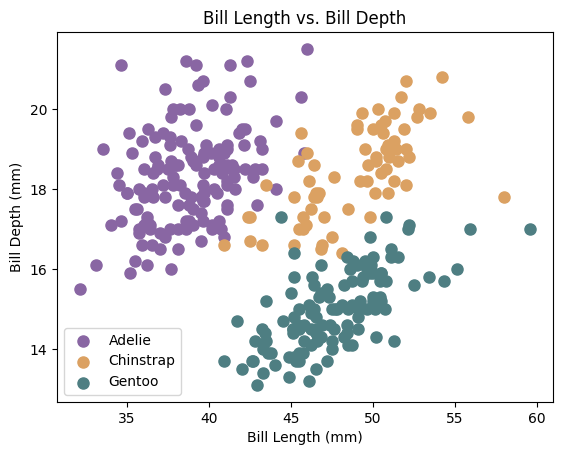

In [41]:
for species in list(colours.keys()):
    mask = penguins[penguins['species'] == species]
    plt.scatter(mask['bill_length_mm'], mask['bill_depth_mm'],
                c=colours[species], s=64, label=species)
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.axis('tight')
plt.legend()
plt.title('Bill Length vs. Bill Depth')
plt.show()


#### b. Flipper Length vs. Body Mass (not used for training here)

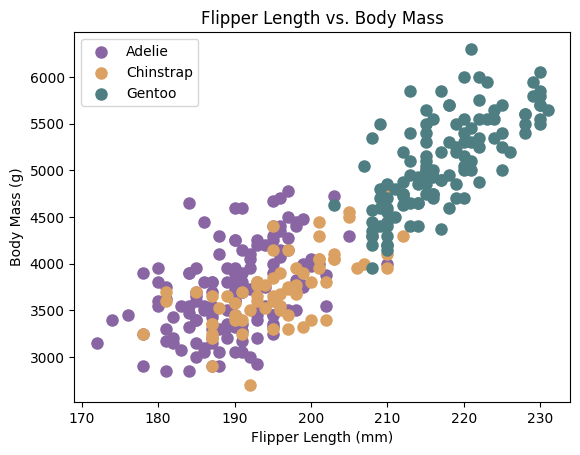

In [42]:
for species in list(colours.keys()):
    mask = penguins[penguins['species'] == species]
    plt.scatter(mask['flipper_length_mm'], mask['body_mass_g'],
                c=colours[species], s=64, label=species)
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.axis('tight')
plt.legend()
plt.title('Flipper Length vs. Body Mass')
plt.show()
 

### 5. Train a Random Forest Classifier
Our forest has 6 Decision Trees and has maximumum of 2 features, hence the max_depth is 2.

In [ ]:
clf=RandomForestClassifier(n_estimators=6, max_depth=2)
clf.fit(x_train,y_train)

,n_estimators,6
,criterion,'gini'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 6. Visualise the random forest for *Explainability*

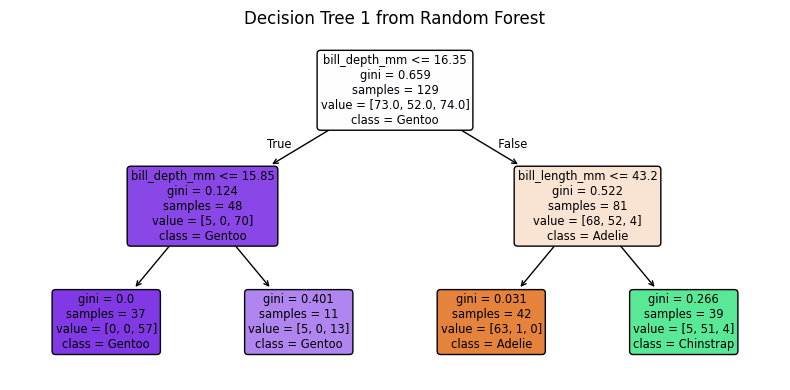

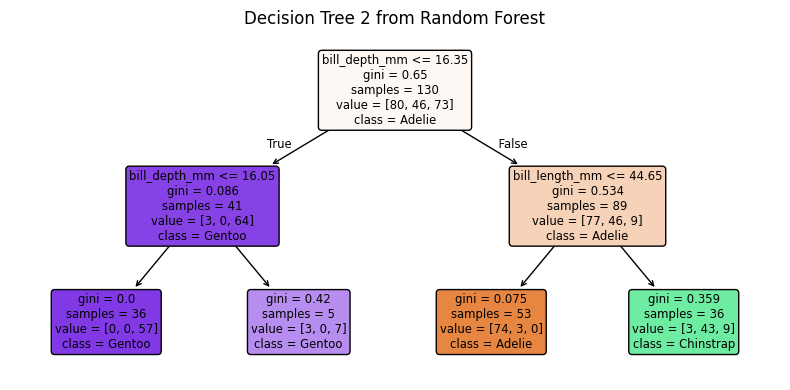

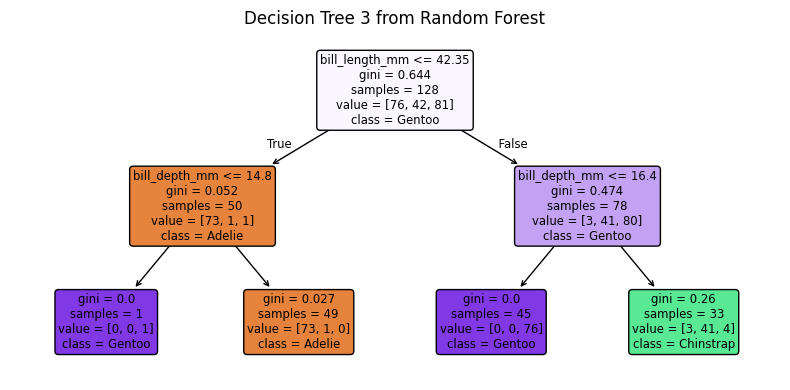

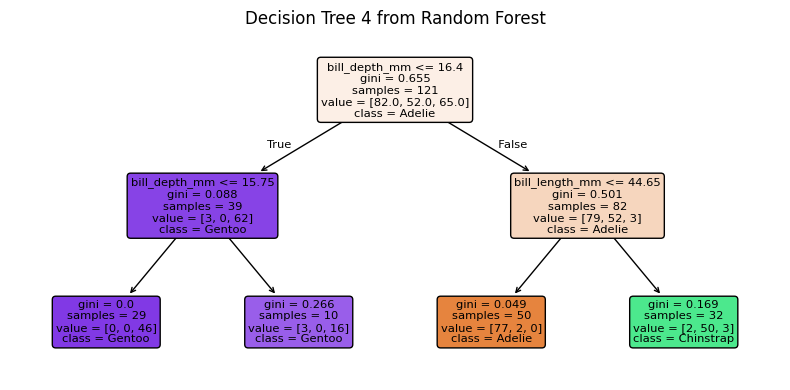

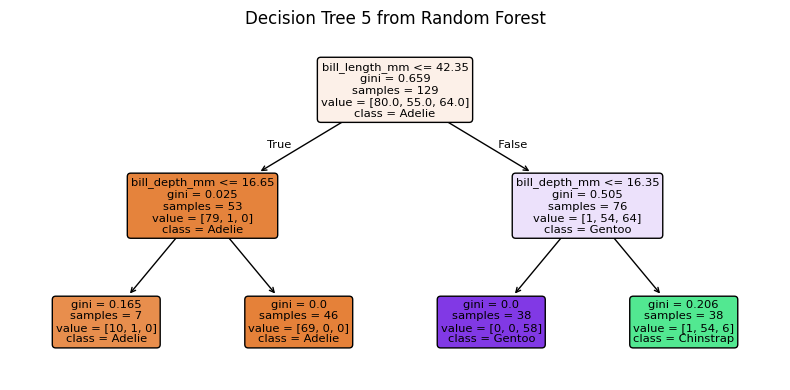

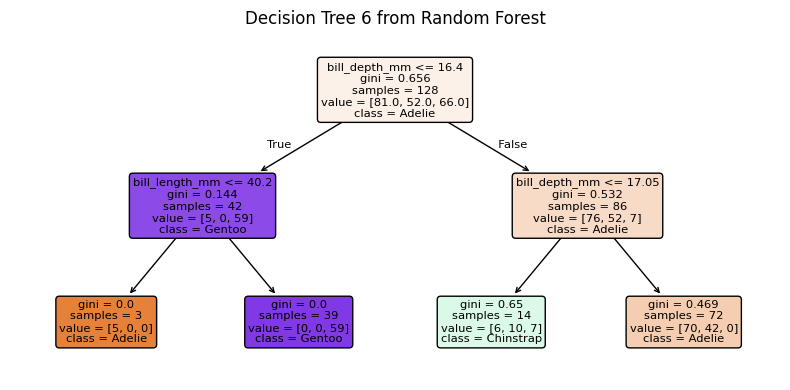

In [48]:
for i, tree in enumerate(clf.estimators_):
    plt.figure(figsize=(8, 4))  # Smaller size: width=8, height=4
    plot_tree(tree, 
              feature_names=feature_names,
              class_names=class_names,
              filled=True,
              rounded=True)
    plt.title(f"Decision Tree {i+1} from Random Forest")
    plt.tight_layout()
    plt.show()


In [45]:
clf.feature_importances_

array([0.4478965, 0.5521035])

### 7. Evaluate the Model

In [46]:
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9552238805970149


###  8. Visualise the Decision Boundaries

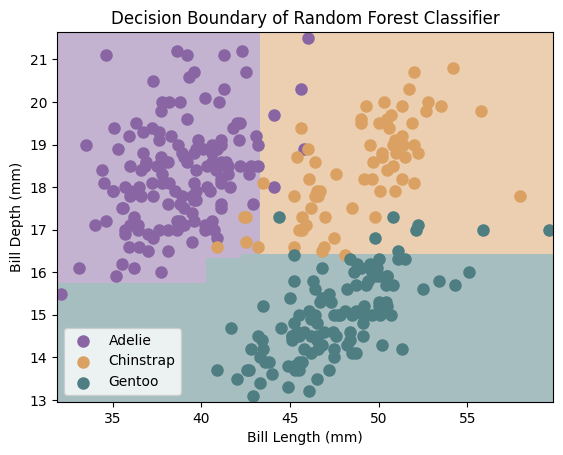

In [47]:
# Create a mesh grid based on feature space
x_min, x_max = penguins['bill_length_mm'].min() - 0.1, penguins['bill_length_mm'].max() + 0.1
y_min, y_max = penguins['bill_depth_mm'].min() - 0.1, penguins['bill_depth_mm'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict over mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision regions
colour_map = ListedColormap(list(colours.values()))
plt.pcolormesh(xx, yy, Z, cmap=colour_map, alpha=0.5, shading='auto')

# Plot training points
for species in list(colours.keys()):
    mask = penguins[penguins['species'] == species]
    plt.scatter(mask['bill_length_mm'], mask['bill_depth_mm'],
                c=colours[species], s=64, label=species)

plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.axis('tight')
plt.legend()
plt.title('Decision Boundary of Random Forest Classifier')
plt.show()
